In [1]:
import pandas as pd
import numpy as np

In [2]:
coso = pd.read_csv('data/coso.csv')
new0 = pd.read_csv('data/New_DB_new0.csv')
new0 = new0[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()
coso = coso[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()

data_0 = pd.read_csv('data/xterrae_data_0').dropna()
data_1 = pd.read_csv('data/xterrae_data_1').dropna()

data_0 = pd.merge(new0, data_0, on=['Latitud', 'Longitud'], how='inner')
data_1 = pd.merge(coso, data_1, on=['Latitud', 'Longitud'], how='inner')

data_0 = data_0.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_1 = data_1.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_0['Valor'] = 0
data_1['Valor'] = 1

final_db = pd.read_csv('data/final_db.csv')
final_db = final_db.drop(columns='Unnamed: 0')

In [3]:
#importe de funciones locales
from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral

#Analizar si todas las columnas estan para luego concatenar
comparar_columnas(final_db, data_0)
comparar_columnas(final_db, data_1)

Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.
Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.


In [4]:
# Concatenación y eliminación de valores NaN
final = pd.concat([final_db, data_0])
final = pd.concat([final, data_1])
final = final.dropna()

# Separación de los valores
final_x = final.drop(columns='Valor')
final_y = final.Valor


In [5]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [6]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.99)
final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 99)


In [7]:
"""import seaborn as sns
import matplotlib.pyplot as plt
corr = final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))

heatmap = sns.heatmap(corr, mask=mask, cmap='pink_r', vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

title = heatmap.set_title("Correlation Heatmap", weight='bold', size=16)
title.set_position([0.45, 1.1])
plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\ncorr = final.corr()\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\nfig, ax = plt.subplots(figsize=(15, 12))\n\nheatmap = sns.heatmap(corr, mask=mask, cmap=\'pink_r\', vmax=.3, center=0,\n            annot=True, fmt=\'.2f\', square=True, linewidths=.5, cbar_kws={"shrink": .5})\n\nplt.xticks(rotation=45, ha=\'right\')\nplt.yticks(rotation=0)\n\ntitle = heatmap.set_title("Correlation Heatmap", weight=\'bold\', size=16)\ntitle.set_position([0.45, 1.1])\nplt.show()'

In [8]:
# Importaciones de funciones para generar los modelos
# Importaciones de selección de características
from feature_selection import cart_feature_selection, seleccion_caracteristicas_genetico
from models_gen_X_y import xgboost_random_search, xgboost_bayesopt_classifier, mlp_binary_classification, svm_with_hyperparameter_tuning

In [9]:
# Selección de características por cart y luego se establecen los dataframe con las características elegidas
cart_features = cart_feature_selection(final, 'Valor', n_features=30)
X = final[cart_features]
y = final['Valor']
print(f'Caracateristicas seleccionadas por cart: {cart_features}')

Caracateristicas seleccionadas por cart: ['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif', 'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif', 'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif', 'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif', 'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif', 'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif', 'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif', 'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif', 'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif', 'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif', 'ksat.15-30cm.tif']


In [21]:
ga_features = ['PIRange_Clay.30-60cm.tif', 'PIRange_Sand.15-30cm.tif', 'n_60-100cm.tif', 'theta_r_60-100cm.tif', 'Bulkd.15-30cm.tif', 'Silt.0-5cm.tif', 'Tex_Class.100-200cm.tif', 'Tex_Class.15-30cm.tif', 'PP', 'slope']
X = final[ga_features]
y = final['Valor']

Número de muestras de entrenamiento: 2518, Número de muestras de prueba: 630
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 83.65%


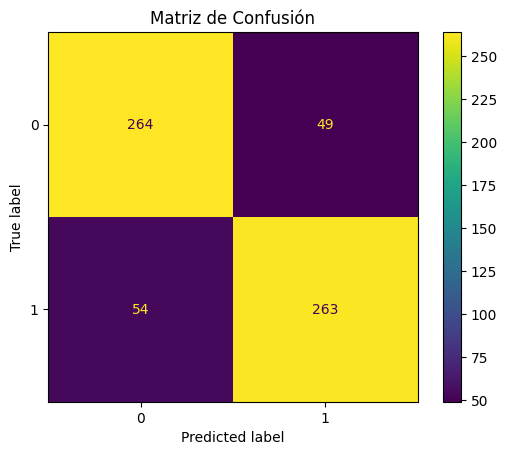

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.3, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=500,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8365079365079365,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 1.0,
  'reg_alpha': 0.5,
  'n_estimators': 500,
  'max_depth': 7,
  'learning_rate': 0.3,
  'gamma': 0,
  'colsample_bytree': 0.8}}

In [22]:
# Estancia para modelo de xgboost_random_search

# Se define los parámetros a buscar para el ajuste del modelo
param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 1.0, 10.0]
        }
xgboost_random_search(X, y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       306
           1       0.74      0.72      0.73       324

    accuracy                           0.72       630
   macro avg       0.72      0.72      0.72       630
weighted avg       0.72      0.72      0.72       630

Matriz de confusión
[[222  84]
 [ 90 234]]


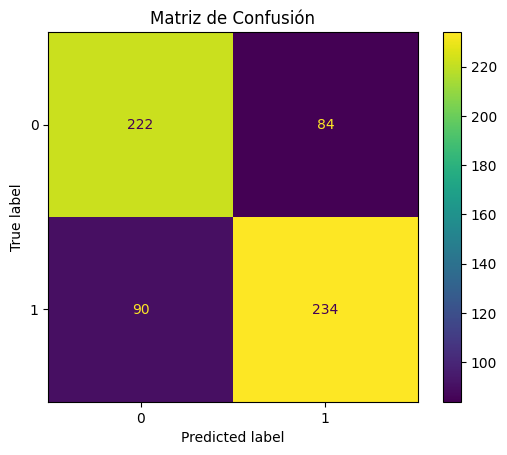

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [23]:
mlp_binary_classification(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [14:28:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.508293914463928, 'xgb__gamma': 0.2560465291496405, 'xgb__learning_rate': 0.23423081744595858, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1.4136772353684972, 'xgb__n_estimators': 588, 'xgb__subsample': 0.845468869051233}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       306
           1       0.81      0.82      0.82       324

    accuracy                           0.81       630
   macro avg       0.81      0.81      0.81       630
weighted avg       0.81      0.81      0.81       630


Matriz de confusión:
[[245  61]
 [ 59 265]]


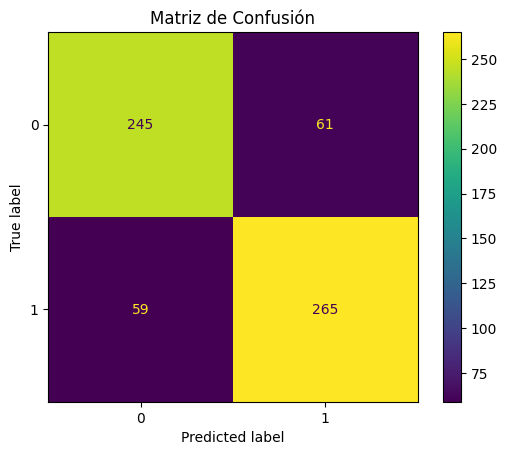

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000142F8E3BE20>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000142F40E25E0>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000142F90FD880>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000142F90DC1F0>},
                   random_state=42, verbose=1)

In [24]:
xgboost_bayesopt_classifier(X,y)

In [10]:
# Se obtuvieron los valores de lo modelos con los datos raw
# ahora se realiza la depuración mediante PUBagging para reentrenar los model
# y comparar los resultados de los modelos sin/con PUBagging

from pubagging import PUBagging

data = final[cart_features]
data['Valor'] = final.Valor
data_aux_1 = data[data.Valor == 1]
data_aux_0 = data[data.Valor == 0]
data_aux_0 = data_aux_0.drop(columns='Valor')
data_aux_1 = data_aux_1.drop(columns='Valor')

landslide_samples = data_aux_1# Example landslide samples as DataFrame
unlabeled_samples = data_aux_0# Example unlabeled samples as DataFrame

pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.4, random_state=42)

pu_bagging.fit(landslide_samples, unlabeled_samples)

probabilities = pu_bagging.predict_proba(unlabeled_samples)
print("Predicted probabilities:", probabilities)

threshold = 0.5 

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)

# Se crean los nuevos dataframe para el reentreno donde tenemos data y data_y como input y output respectivamente
selected_non_landslide_samples['Valor'] = 0
data_aux_1['Valor'] = 1

data = pd.concat([data_aux_1, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

C:\Users\ivo\AppData\Local\Temp\ipykernel_16688\2406970788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Valor'] = final.Valor


Predicted probabilities: [0.2 0.  0.2 ... 0.2 0.2 0.6]
Muestras no deslizamiento seleccionadas:
          slope  valor_humedad_suelo1          PP  ksat_60-100cm.tif  \
0     32.357300              0.421875   13.532034         282.394012   
1     32.357300              0.438995  238.139918         282.394012   
2     37.497812              0.520004   32.059045         144.182007   
3     36.717389              0.478973    0.000000          90.413002   
4     60.517945              0.438095    2.191190         343.306000   
...         ...                   ...         ...                ...   
1162  24.327043              0.416611    0.674241         279.865997   
1163  24.327043              0.416611    0.674241         261.084015   
1164  24.641348              0.313675    1.054908         252.315994   
1166  35.755171              0.306458    0.000000         120.091003   
1167  40.502730              0.335510    0.000000         119.821999   

      PIRange_Clay.15-30cm.tif  PIRange

C:\Users\ivo\AppData\Local\Temp\ipykernel_16688\2406970788.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_non_landslide_samples['Valor'] = 0


Número de muestras de entrenamiento: 2356, Número de muestras de prueba: 589
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 86.08%


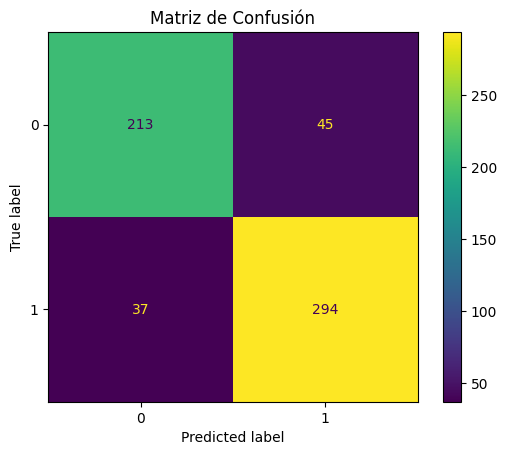

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.3, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=500,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8607809847198642,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 1.0,
  'reg_alpha': 0.5,
  'n_estimators': 500,
  'max_depth': 7,
  'learning_rate': 0.3,
  'gamma': 0,
  'colsample_bytree': 0.8}}

In [26]:
# Se realiza el reentranmiento de los modelos con los datos ahora depurados
xgboost_random_search(data, data_y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       265
           1       0.83      0.82      0.82       324

    accuracy                           0.81       589
   macro avg       0.81      0.81      0.81       589
weighted avg       0.81      0.81      0.81       589

Matriz de confusión
[[211  54]
 [ 59 265]]


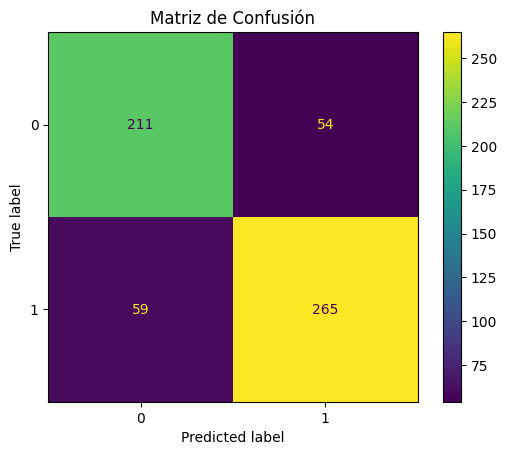

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [27]:
mlp_binary_classification(data,data_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.7954166302845054, 'xgb__gamma': 0.015250124969524714, 'xgb__learning_rate': 0.046974706861722275, 'xgb__max_depth': 8, 'xgb__min_child_weight': 3.381022389395617, 'xgb__n_estimators': 543, 'xgb__subsample': 0.6633256208980205}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       265
           1       0.85      0.90      0.88       324

    accuracy                           0.86       589
   macro avg       0.86      0.85      0.86       589
weighted avg       0.86      0.86      0.86       589


Matriz de confusión:
[[215  50]
 [ 33 291]]


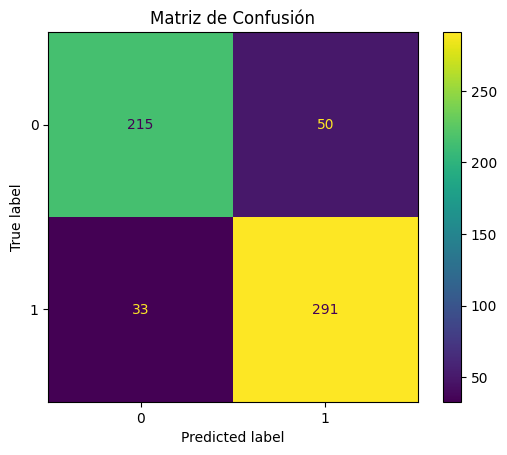

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000142F8C0E970>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000142F52EF100>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000142F3EEBA60>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000142F51B6A00>},
                   random_state=42, verbose=1)

In [28]:
xgboost_bayesopt_classifier(data,data_y)

In [29]:
svm_with_hyperparameter_tuning(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
final

In [ ]:
#target_column = 'Valor'
#mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column)
#print("Mejores características seleccionadas:", mejores_caracteristicas)
#print("Mejor fitness:", hof[0].fitness.values[0])

Learning rate set to 0.014854
0:	learn: 0.6901990	total: 136ms	remaining: 2m 16s
1:	learn: 0.6869407	total: 139ms	remaining: 1m 9s
2:	learn: 0.6834586	total: 141ms	remaining: 47s
3:	learn: 0.6812051	total: 144ms	remaining: 35.9s
4:	learn: 0.6778261	total: 148ms	remaining: 29.4s
5:	learn: 0.6748557	total: 151ms	remaining: 25s
6:	learn: 0.6716965	total: 153ms	remaining: 21.7s
7:	learn: 0.6689163	total: 156ms	remaining: 19.4s
8:	learn: 0.6656053	total: 159ms	remaining: 17.5s
9:	learn: 0.6626743	total: 163ms	remaining: 16.1s
10:	learn: 0.6599848	total: 166ms	remaining: 14.9s
11:	learn: 0.6573702	total: 168ms	remaining: 13.8s
12:	learn: 0.6547120	total: 171ms	remaining: 13s
13:	learn: 0.6520290	total: 173ms	remaining: 12.2s
14:	learn: 0.6493103	total: 176ms	remaining: 11.5s
15:	learn: 0.6465813	total: 179ms	remaining: 11s
16:	learn: 0.6443023	total: 182ms	remaining: 10.5s
17:	learn: 0.6421344	total: 184ms	remaining: 10.1s
18:	learn: 0.6395608	total: 187ms	remaining: 9.66s
19:	learn: 0.63714

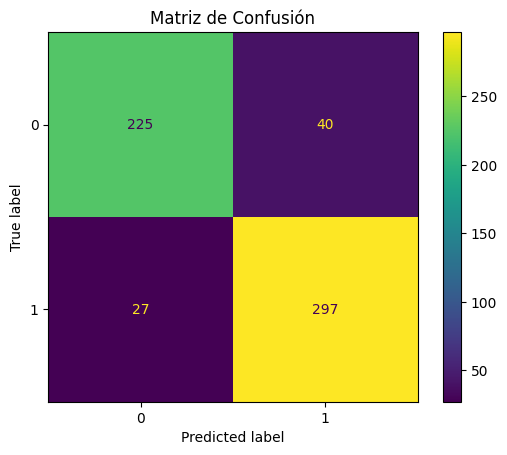

In [11]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from models_gen_X_y import plot_confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)

model = CatBoostClassifier()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
predictions = model.predict(X_test)
print(predictions)
plot_confusion_matrix(model, X_test, y_test)

In [12]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       265
           1       0.88      0.92      0.90       324

    accuracy                           0.89       589
   macro avg       0.89      0.88      0.88       589
weighted avg       0.89      0.89      0.89       589



In [13]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier()
random_search_cb = RandomizedSearchCV(estimator=CB, param_distributions=catboost_param_dist,
                                      cv = 5, verbose = 2, random_state=42)
random_search_cb.fit(X_train, y_train)
predictions = random_search_cb.predict(X_test)
print(classification_report(y_pred= predictions, y_true = y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6772572	total: 2.55ms	remaining: 204ms
1:	learn: 0.6635492	total: 4.52ms	remaining: 179ms
2:	learn: 0.6486362	total: 6.67ms	remaining: 174ms
3:	learn: 0.6362792	total: 8.76ms	remaining: 169ms
4:	learn: 0.6253790	total: 10.7ms	remaining: 163ms
5:	learn: 0.6138221	total: 12.6ms	remaining: 158ms
6:	learn: 0.6047791	total: 14.8ms	remaining: 156ms
7:	learn: 0.5963562	total: 17.3ms	remaining: 157ms
8:	learn: 0.5885310	total: 19.4ms	remaining: 155ms
9:	learn: 0.5817892	total: 21.4ms	remaining: 152ms
10:	learn: 0.5737821	total: 23.6ms	remaining: 150ms
11:	learn: 0.5647194	total: 25.7ms	remaining: 148ms
12:	learn: 0.5568063	total: 28.3ms	remaining: 148ms
13:	learn: 0.5490196	total: 30.3ms	remaining: 145ms
14:	learn: 0.5430072	total: 32.2ms	remaining: 142ms
15:	learn: 0.5350618	total: 34.3ms	remaining: 139ms
16:	learn: 0.5284690	total: 36.3ms	remaining: 137ms
17:	learn: 0.5212459	total: 38.4ms	remaining: 134ms
18:	learn: 0.

In [38]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


scores = ['precision', 'recall']
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)



In [ ]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(SVC(), X,y, train_size = 0.8, cv=5)

In [ ]:
# Guardar plk 85%+ modelos
# countplot
# gráficos de conf, roc curve, model selection
# proceso de plks en scripts


# MODELOS
# SVM
# xgboost randon search + bayes opt
# catboost
# mlp

In [ ]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
    init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
    init_out = rng.standard_normal(size=n_hidden).astype(floatX)

    coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        "obs_id": np.arange(X_train.shape[0]),
    }
    with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", Y_train, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=Y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )
    return neural_network


neural_network = construct_nn(X_train, Y_train)